# 라이브러리 로드

In [24]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# error 창 안 보이게 해줌
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 가용폰트 확인
for font in mpl.font_manager.findSystemFonts():
    # print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumBarunGothic'# 폰트명
print(mpl.rcParams['font.family'])

['NanumBarunGothic']


# 데이터 로드

In [25]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = 'C:/titanic_datas/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission_0220.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

In [26]:
DATA_PATH = "C:/titanic_datas/"

df = pd.read_csv(DATA_PATH+"train.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [27]:
ori_tr = pd.read_csv(args.train_csv)
ori_te = pd.read_csv(args.test_csv)

ori_tr.shape, ori_te.shape

((916, 12), (393, 11))

In [28]:
pd.read_csv(args.default_submission_csv).shape

(393, 2)

In [29]:
ori_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [30]:
ori_te.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [31]:
ori_tr.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [32]:
ori_tr[['passengerid']].head()

,passengerid
0,0
1,1
2,2
3,3
4,4


In [33]:
ori_tr.drop('passengerid', axis=1, inplace=True)
ori_tr.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [34]:
ori_te.set_index(['passengerid'], inplace=True)
print(f'{ori_te.shape}')
ori_te.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [35]:
ori_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   name      916 non-null    object 
 3   gender    916 non-null    object 
 4   age       736 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   ticket    916 non-null    object 
 8   fare      916 non-null    float64
 9   cabin     198 non-null    object 
 10  embarked  915 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 78.8+ KB


# EDA

In [36]:
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

How many Survived??

gender

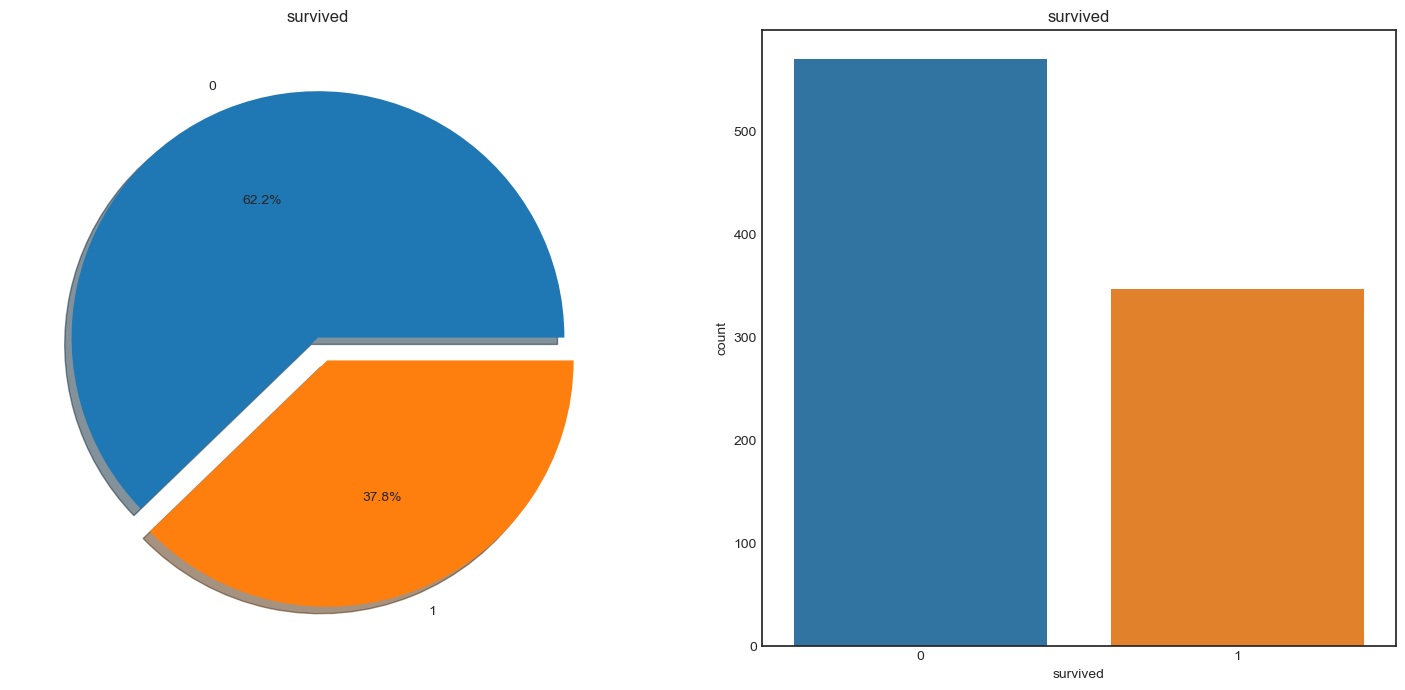

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=ori_tr,ax=ax[1])
ax[1].set_title('survived')
plt.show()

In [38]:
ori_tr.groupby(['gender','survived'])['survived'].count()

gender  survived
female  0            54
        1           273
male    0           516
        1            73
Name: survived, dtype: int64

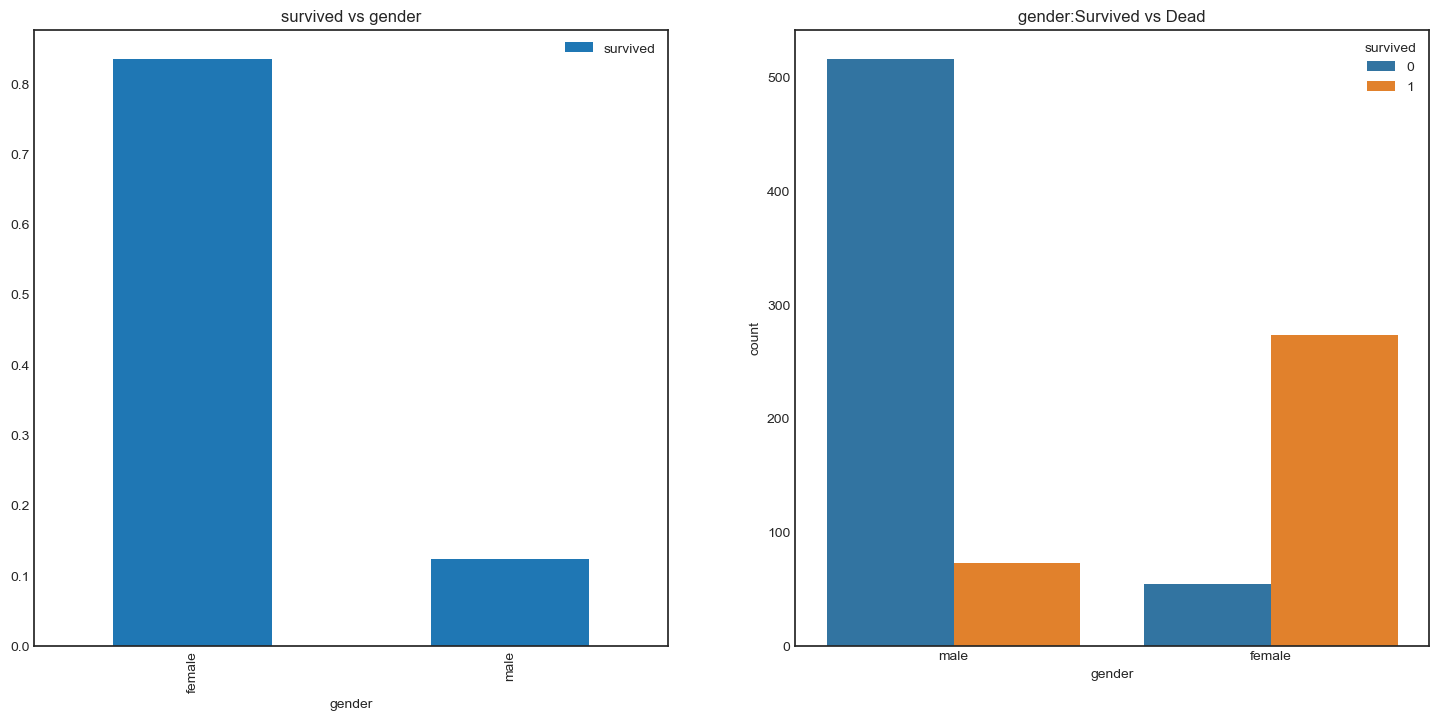

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr[['gender','survived']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs gender')
sns.countplot('gender',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('gender:Survived vs Dead')
plt.show()

pclass

In [40]:
pd.crosstab(ori_tr.pclass,ori_tr.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


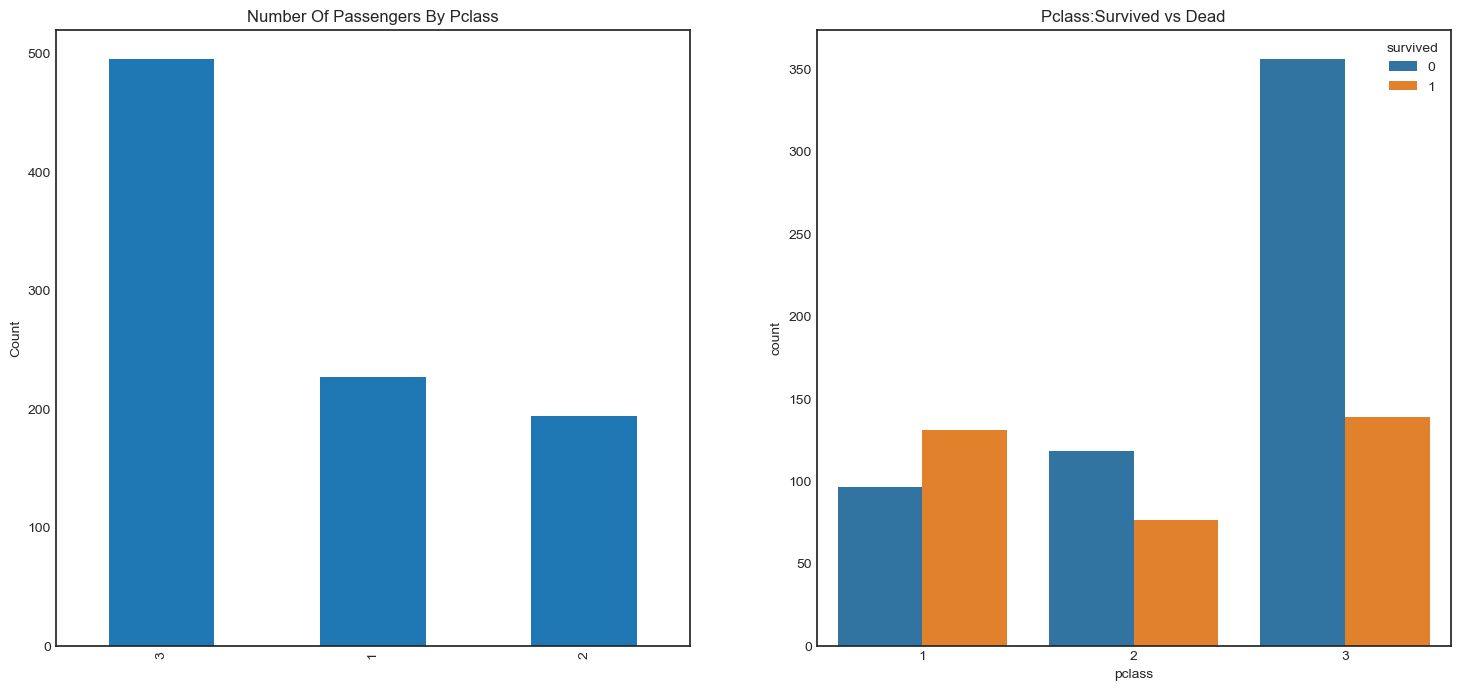

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [42]:
pd.crosstab([ori_tr.gender, ori_tr.survived],ori_tr.pclass,margins=True).style.background_gradient(cmap='summer_r')

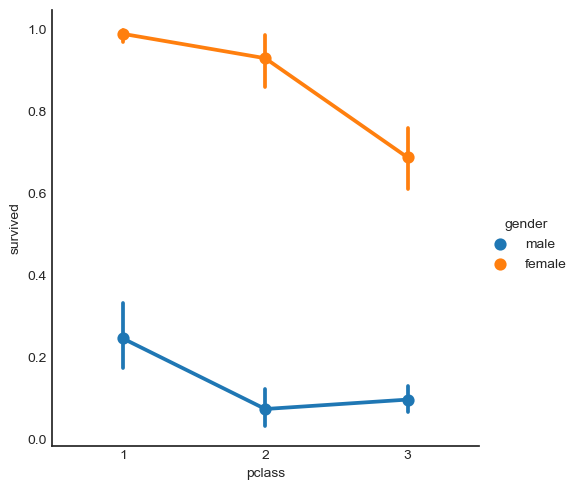

In [43]:
sns.factorplot('pclass','survived',hue='gender',data=ori_tr)
plt.show()

age

In [44]:
print('Oldest Passenger was of:',ori_tr['age'].max(),'Years')
print('Youngest Passenger was of:',ori_tr['age'].min(),'Years')
print('Average Age on the ship:',ori_tr['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.69836956521739 Years


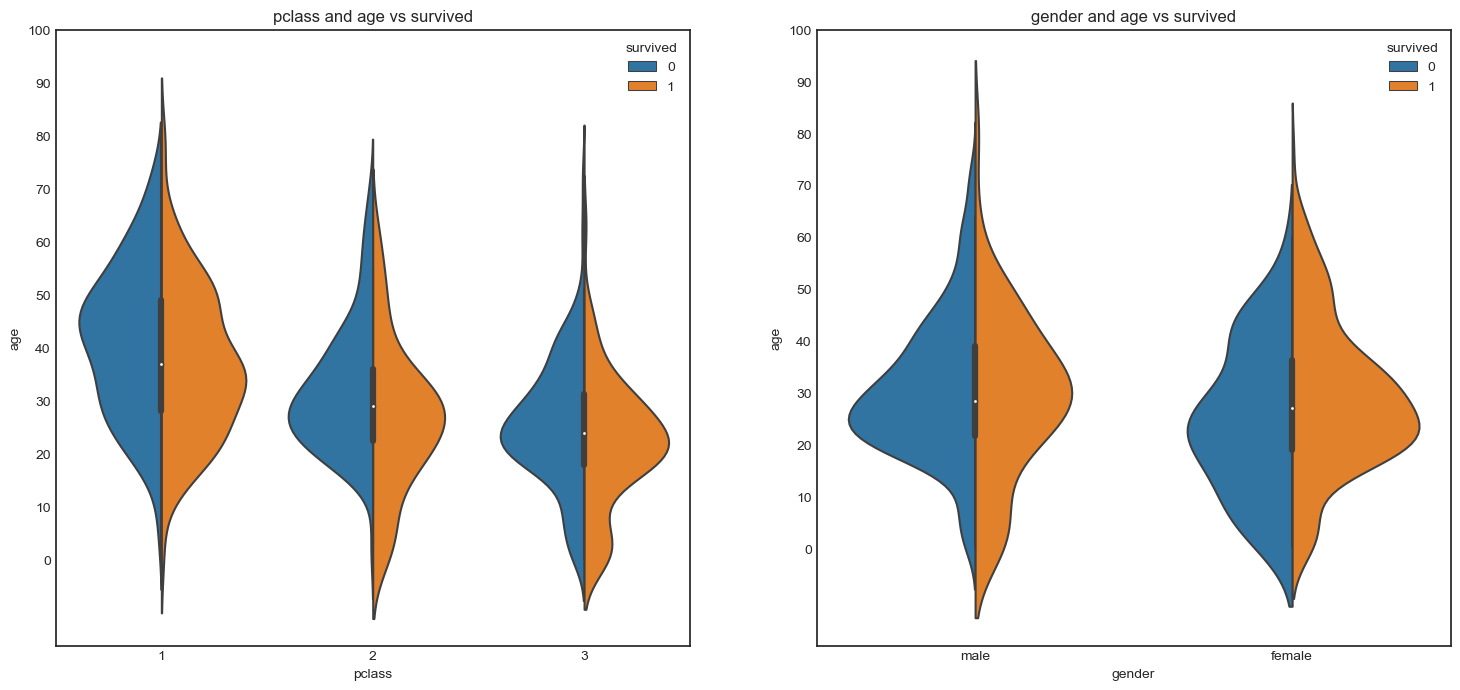

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=ori_tr,split=True,ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="survived", data=ori_tr,split=True,ax=ax[1])
ax[1].set_title('gender and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [47]:
ori_tr['initial']=0
for i in ori_tr:
    ori_tr['initial']=ori_tr.name.str.extract('([A-Za-z]+)\.') 

In [48]:
pd.crosstab(ori_tr.initial, ori_tr.gender).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev,Sir
gender,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,185,1,0,138,1,0,0
male,1,3,0,1,4,1,2,42,0,0,528,0,0,6,1


In [49]:
ori_tr['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [50]:
ori_tr.groupby('initial')['age'].mean() #lets check the average age by Initials

initial
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

Filling NaN Ages

In [51]:
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mr'),'age']=33
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mrs'),'age']=36
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Master'),'age']=5
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Miss'),'age']=22
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Other'),'age']=46

In [53]:
ori_tr.age.isnull().any() #So no null values left finally 

False

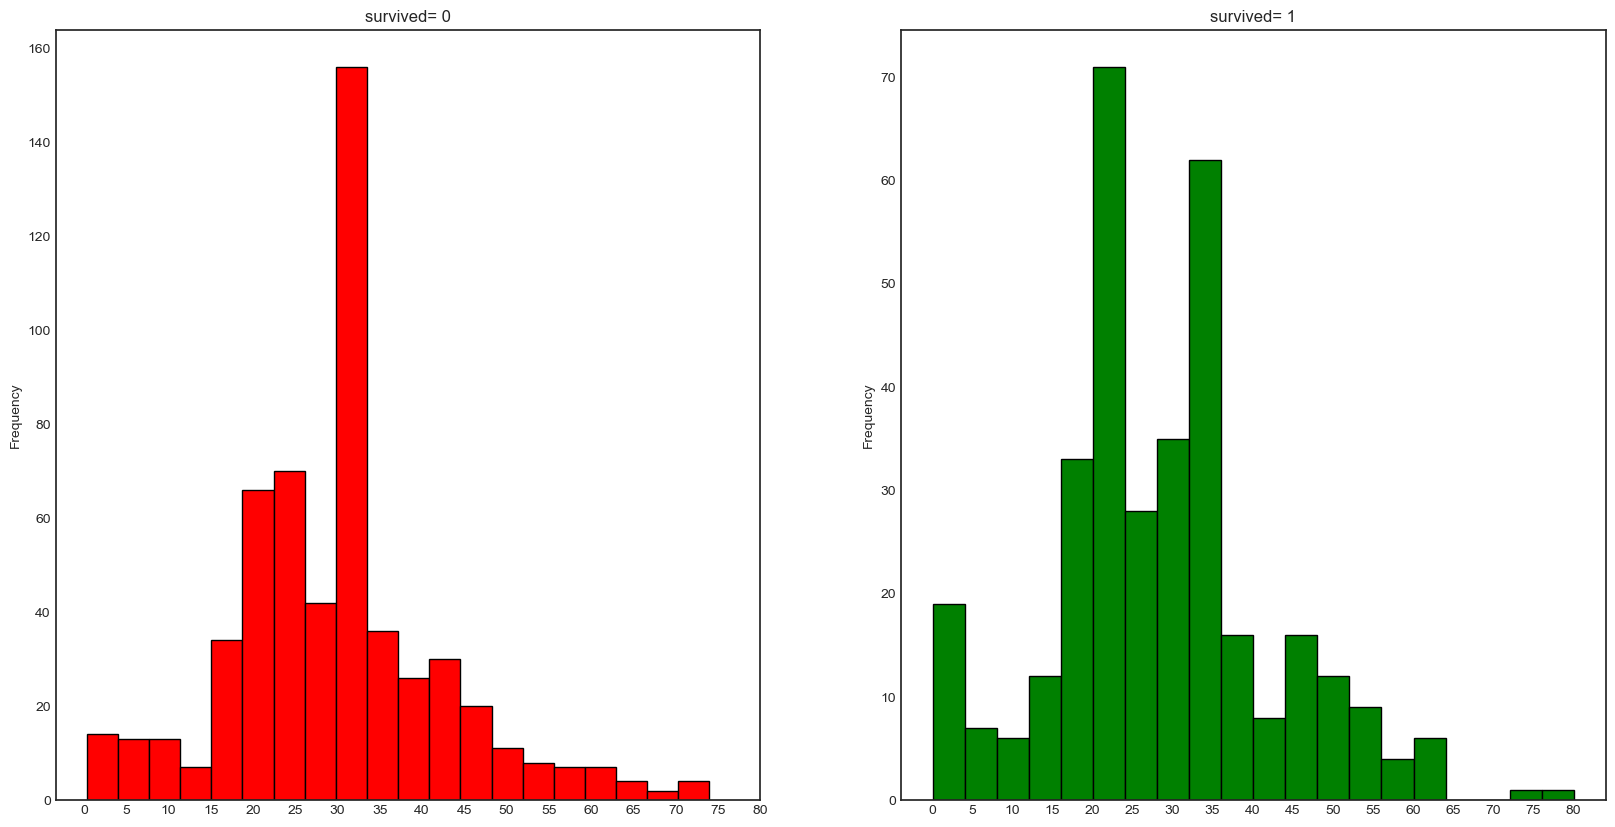

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,10))
ori_tr[ori_tr['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ori_tr[ori_tr['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

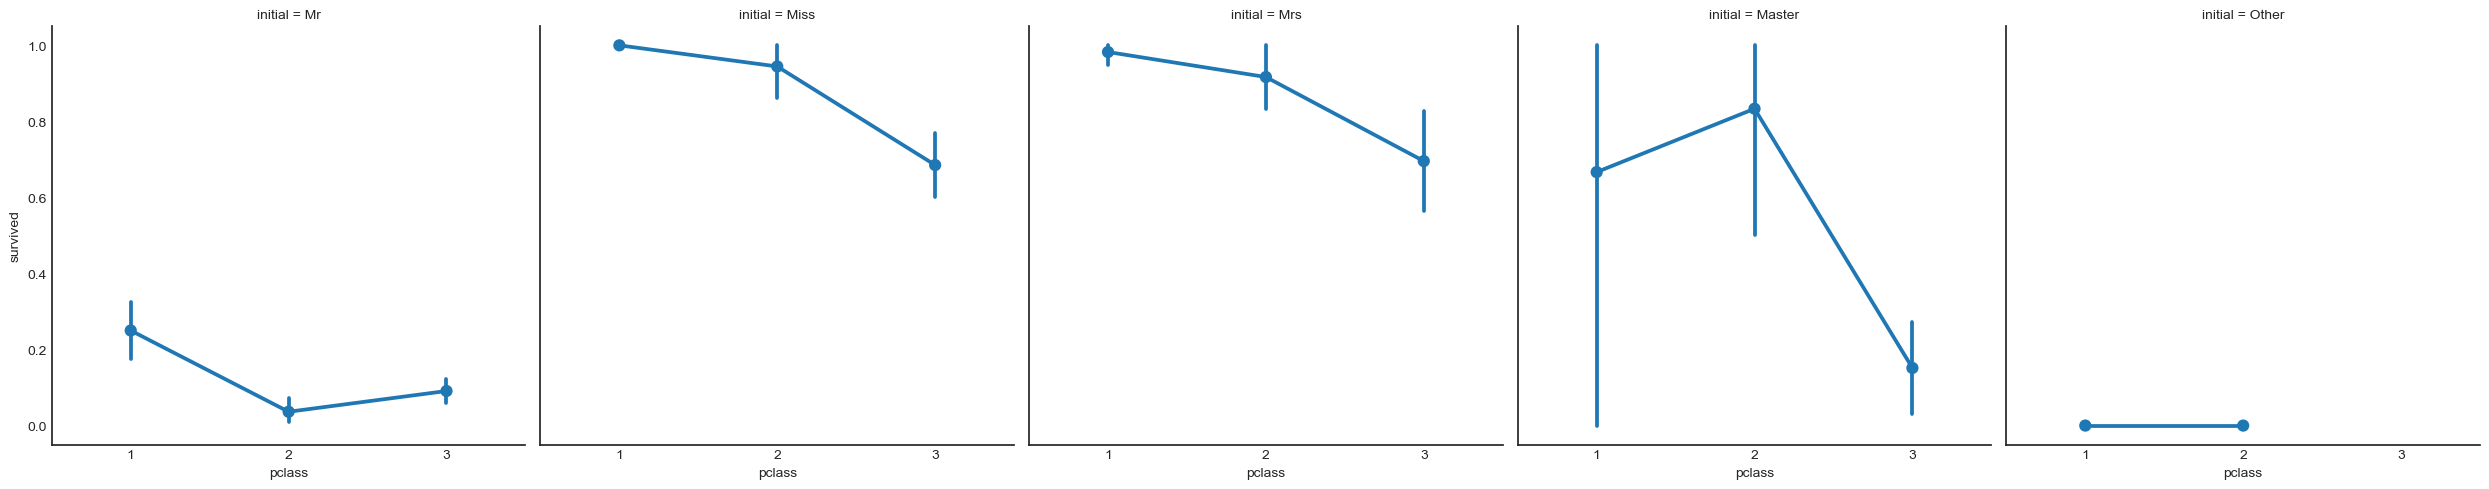

In [55]:
sns.factorplot('pclass','survived',col='initial',data=ori_tr)
plt.show()

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')